# Laboratory Task 2 – Forward Pass

In [ ]:
#import necessary libraries
import numpy as np

In [4]:
# Input and target
x = np.array([1, 0, 1])
y = 1

# Weights and biases
W_hidden = np.array([[0.2, -0.3],
                     [0.4,  0.1],
                     [-0.5, 0.2]])

b_hidden = np.array([-0.4, 0.2])

W_out = np.array([-0.3, -0.2])
b_out = 0.1

# ReLU function
relu = lambda z: np.maximum(0, z)

# Forward pass
Z_hidden = x @ W_hidden + b_hidden
H = relu(Z_hidden)

Z_out = H @ W_out + b_out
y_hat = relu(Z_out)

# Error
error = y - y_hat
mse = error**2

print("Hidden layer outputs:", H)
print("Predicted output (y_hat):", y_hat)
print("Error (y - y_hat):", error)
print("MSE:", mse)

Hidden layer outputs: [0.  0.1]
Predicted output (y_hat): 0.08
Error (y - y_hat): 0.92
MSE: 0.8464


x shape: (3,) W_hidden shape: (3, 2) b_hidden shape: (2,)
Z_hidden (pre-activation): [-0.7  0.1]
H (hidden activations after ReLU): [0.  0.1]
Z_out (pre-activation): 0.08
y_hat (after ReLU): 0.08
Error (y - y_hat): 0.92
MSE: 0.8464


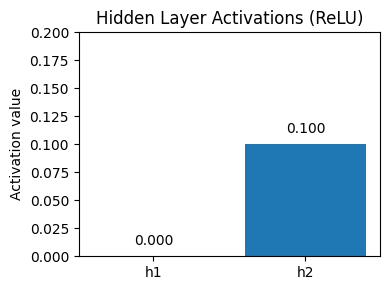

Saved plot to: images\lab2_hidden_activations.png


In [ ]:
# Additional code for plotting and saving the hidden layer activations
import matplotlib.pyplot as plt
from pathlib import Path

# Create images dir
Path("images").mkdir(exist_ok=True)

# Input and target
x = np.array([1.0, 0.0, 1.0])
y = 1.0

# Weights and biases
W_hidden = np.array([[0.2, -0.3],
                     [0.4,  0.1],
                     [-0.5, 0.2]])   # shape (3,2)
b_hidden = np.array([-0.4, 0.2])      # shape (2,)

W_out = np.array([-0.3, -0.2])        # shape (2,)
b_out = 0.1

# ReLU function
def relu(z):
    return np.maximum(0, z)

# Forward pass - hidden
Z_hidden = x @ W_hidden + b_hidden   # (2,)
H = relu(Z_hidden)

# Forward pass - output
Z_out = H @ W_out + b_out
y_hat = relu(Z_out)

# Error and MSE
error = y - y_hat
mse = (error)**2

# Print intermediate values
print("x shape:", x.shape, "W_hidden shape:", W_hidden.shape, "b_hidden shape:", b_hidden.shape)
print("Z_hidden (pre-activation):", np.round(Z_hidden, 4))
print("H (hidden activations after ReLU):", np.round(H, 4))
print("Z_out (pre-activation):", np.round(Z_out, 4))
print("y_hat (after ReLU):", np.round(y_hat, 4))
print("Error (y - y_hat):", np.round(error, 4))
print("MSE:", np.round(mse, 6))

# Plot hidden activations
neurons = ["h1", "h2"]
plt.figure(figsize=(4,3))
plt.bar(neurons, H)
plt.title("Hidden Layer Activations (ReLU)")
plt.ylabel("Activation value")
plt.ylim(0, max(0.2, H.max() + 0.05))
for i, v in enumerate(H):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
img_path = Path("images") / "lab2_hidden_activations.png"
plt.savefig(img_path, dpi=150)
plt.show()
print(f"Saved plot to: {img_path}")

### Reflection
In this lab, I implemented a manual forward pass of a small neural network.  
- ReLU zeroes negative pre-activations; here `H = [0.0, 0.1]`, so the first hidden neuron was inactive.
- The network's single forward pass produced `ŷ = 0.08` with error `0.92` (MSE ≈ 0.8464).  
- This result is expected with random-looking initial weights — training with backpropagation is required to update weights and reduce error.  
- Next lab: implement backward propagation to compute gradients and update weights.